# 닮은 연예인 찾기

## 1. 데이터 준비하기

* celebrity.tar.xz 을 사용하였읍니다.

### 1-1. 샘플 이미지 확인

file_list: ['오재원.jpg', '아이유.jpg', '조인성.jpg', '박해일.jpeg', '택연.jpg', '이민호.jpeg', '티모시 달튼.jpeg', '뷔.png', '무라니시.png', '저스틴 존슨.jpeg', '정수빈.jpg', '이동휘.jpg', '공효진.jpg', '이제훈.jpeg', '슬기.jpg', '케빈 스페이시.jpeg', '조이.jpg', '크리스 햄스워스.jpg', '주진모(올드).jpg', '슈가.jpg', '앤드류 응.png', '박성호.jpg', '이승환.jpg', '이용진.jpg', '이대형.jpg', '개코.jpeg', '조승우.jpeg', '강민경.jpg', '이경규.jpeg', '문별.jpg', '장원준.jpeg', '김종서.jpg', '박진영.jpeg', '박재범.jpg', '홍구.jpg', '서강준.jpg', '영알남.png', '여자아이들수진.jpeg', '지호.jpg', '서현진.jpg', '성시경.jpg', '최준석.jpg', '비니.jpg', '성룡.jpg', '효정.jpg', '잭 블랙.jpeg', '첸.jpg', '톰 홀랜드.jpg', '제이콥 배털론.jpg', '진.jpg', '박용택.jpg', '이진호.jpeg', '이영하.jpg', '사쿠라.jpg', '박건우.png', '솔라.jpg', '유노윤호.jpg', '김래원.jpeg', '이승철.jpeg', '이준혁.jpeg', '대도서관.jpeg', '류준열.jpg', '이정재.jpeg', '로다주.jpeg', '미미.jpg', 'b1a4진영.jpeg', '피어스 브로스넌.jpg', '박명수.jpg', '한기범.jpg', '최양락.jpg', 'clinton.jpeg', '지민(BTS).jpg', '김학범.jpg', '이희준.jpg', '제프리 힌턴.jpg', '이말년.png', '매드클라운.jpeg', '정국.jpg', '전소미.jpg', '조달환.png', '케이.jpg', '하정우.jpg', '디오.jpeg', '아이즈원김채원.jpg', '아

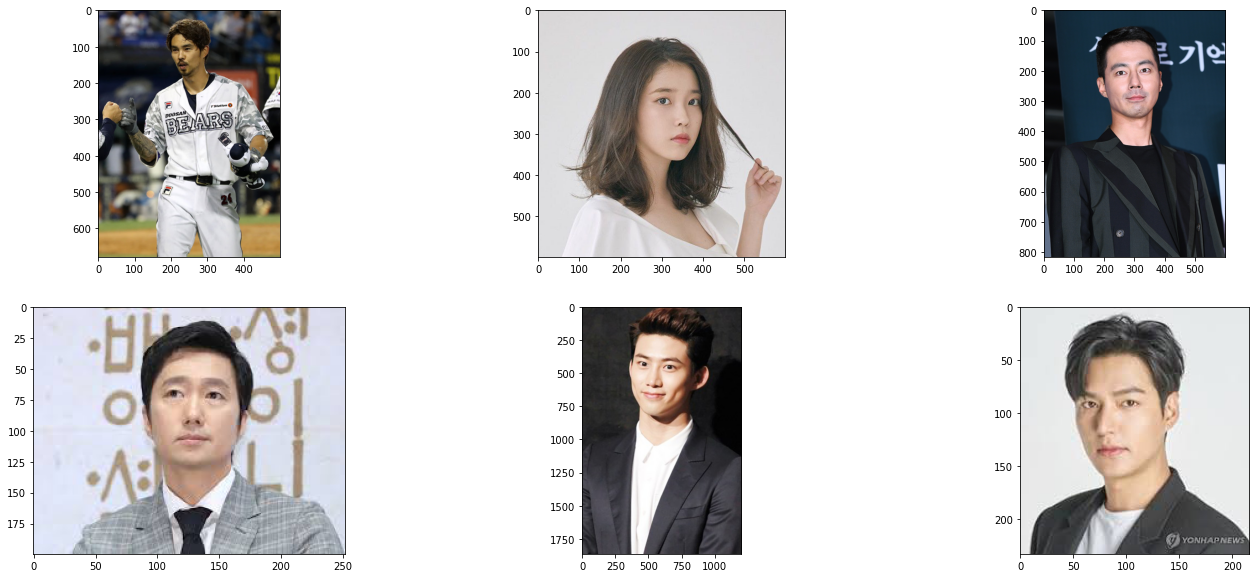

In [1]:
import os

dir_path = os.getenv('HOME')+'/aiffel/E5_images/celebrity'
file_list = os.listdir(dir_path)

print ("file_list: {}".format(file_list))

import matplotlib.pyplot as plt
import matplotlib.image as img

#Set figsize here
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(24,10))

# flatten axes for easy iterating
for i, ax in enumerate(axes.flatten()):
  image = img.imread(dir_path+'/'+file_list[i])
  ax.imshow(image)
plt.show()

fig.tight_layout()

## 2. 얼굴 추출하기
 * 이미지 한개만 우선적으로 시도

[(56, 185, 146, 96)]


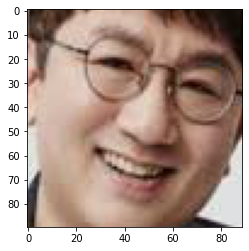

In [24]:
import face_recognition
import os
%matplotlib inline
import matplotlib.pyplot as plt

# 방시혁.jpeg 불러오기
image_path = os.getenv('HOME')+'/aiffel/E5_images/celebrity/방시혁.jpeg'
image = face_recognition.load_image_file(image_path)

# 이미지안의 얼굴 찾기
face_locations = face_recognition.face_locations(image)

print(face_locations)  # 이미지에서 얼굴 영역의 좌표 출력

# 박스를 찾고, 임베딩 추출을 할 이미지를 만들기 위해 자라줌
a, b, c, d = face_locations[0]
cropped_face = image[a:c,d:b,:]

# 얼굴부분이 잘 나왔는지 확인
plt.imshow(cropped_face)

### 2-1. 얼굴 추출 함수

In [3]:
import face_recognition
import os

def get_cropped_face(image_file):
    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image)
    a, b, c, d = face_locations[0]
    cropped_face = image[a:c,d:b,:]    
    
    return cropped_face

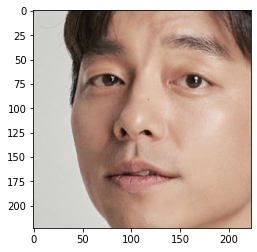

In [4]:
# 공유로 함수 테스트하기
image_path = os.getenv('HOME')+'/aiffel/E5_images/celebrity/공유.jpg'

cropped_face = get_cropped_face(image_path)
plt.imshow(cropped_face)

## 3. 얼굴 임베딩 추출

In [5]:
image_file = os.path.join(dir_path, '방시혁.jpeg')
# 얼굴 추출 함수
face = get_cropped_face(image_file)

# 얼굴 영역을 가지고 얼굴 임베딩 벡터를 구하는 함수
def get_face_embedding(face):
    return face_recognition.face_encodings(face)

embedding = get_face_embedding(face)  
embedding

[array([-0.05454719,  0.03053331,  0.04735763,  0.01472094, -0.05814021,
        -0.08465413, -0.07226539, -0.11427873,  0.08370614, -0.09100722,
         0.16447349, -0.03125167, -0.18802463, -0.06457888, -0.03340021,
         0.18285017, -0.18274795, -0.09862624, -0.12608874, -0.06224805,
         0.04910352,  0.04954361,  0.02211454, -0.01727099, -0.06017793,
        -0.33762416, -0.05559994, -0.02163227,  0.03063501,  0.03798345,
        -0.02022292,  0.02880006, -0.16845064, -0.05687523,  0.08228013,
         0.07933307, -0.01852617, -0.08267391,  0.23029521, -0.01520539,
        -0.22086796,  0.08232726,  0.09125063,  0.22447221,  0.23266557,
         0.04015945,  0.023502  , -0.13594688,  0.1409853 , -0.14567365,
         0.00557872,  0.17454039,  0.09499887,  0.04108589, -0.00247409,
        -0.08599553,  0.03963231,  0.12533398, -0.15381987, -0.0603776 ,
         0.12402729, -0.07176417, -0.02232203, -0.04583896,  0.19952935,
         0.03307256, -0.11984842, -0.20151974,  0.0

### 3-1. 얼굴 임베딩 추출 함수

In [21]:
def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {}
    
    for file in file_list:
        img_path = os.path.join(dir_path, file)
        face = get_cropped_face(img_path)
        embedding = get_face_embedding(face)
        if len(embedding) > 0:  
        # 얼굴영역 face가 제대로 detect되지 않으면  len(embedding)==0인 경우가 발생하므로 
        # os.path.splitext(file)[0]에는 이미지파일명에서 확장자를 제거한 이름이 담깁니다. 
            embedding_dict[os.path.splitext(file)[0]] = embedding[0]
            
    return embedding_dict

In [25]:
# 함수 테스트
embedding_dict = get_face_embedding_dict(dir_path)
embedding_dict['방시혁.jpeg']

IndexError: list index out of range

## 4. 얼굴 임베딩 사이의 거리 측정

In [10]:
import numpy as np
def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)

get_distance('공유', '방시혁')

NameError: name 'embedding_dict' is not defined

## 5. 닮은 꼴 찾기

In [15]:
def get_nearest_face(name, top=5):
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))
    
    for i in range(top+1):
        if i == 0 :   # 첫번째로 나오는 이름은 자기 자신일 것이므로 제외합시다. 
            continue
        if sorted_faces[i]:
            print('순위 {} : 이름({}), 거리({})'.format(i, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))

In [16]:
get_nearest_face('방시혁')

NameError: name 'embedding_dict' is not defined